In [2]:
from IPython.display import Latex, Image, display, HTML
from __future__ import division # Enable the new behaviour: 3/2 = 1.5
from numpy import *
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt  # matplotlib routines imported under the shortcut plt
import numpy as np
%matplotlib inline
# Custom Plot parameters for linewidth, fonts etc
matplotlib.rcParams['lines.linewidth'] = 3; 
matplotlib.rcParams['font.size'] = 13;
matplotlib.rcParams['lines.markersize'] = 10
matplotlib.rc('axes', grid=False, labelsize=18, titlesize=16, ymargin=0); 
matplotlib.rc('legend',numpoints=1,fontsize=11)

# Workshop 2: quantifying spectra, weeks 3-5

###### In this series of workshops, you will develop the tools needed to carry out a simple analysis of spectroscopic data using python. You will not be expected to write an entire python program as part of these workshops. You will be expected to adapt the code you have been provided with, to encode appropriate formulae in python format, and to approach programming problems logically and systematically. 

Workshop 2 covers the following topics and tasks:

* Topic 2.1: Modelling continuum emission, part 1.
* Exercise A: Measuring continuum fluxes properly


You should aim to complete these tasks within the space of one hour. If you're a competent programmer, this should be esily doable, but even if python still gives you the jitters, it shouldn't take more than two. ASK FOR HELP IF YOU'RE STUCK. This workshop builds on from workshop 1, and we will continue using these spectra and developing your skills into workshop 3. Your work will be automatically collected from both notebooks at 5pm Tuesday 6th March.

## 2.1 Modelling the Spectral Continuum

As we covered last time, the continuum flux -- or more properly, the *intensity of the continuum* -- tells us the average strength of the observed spectral emission in regions of the spectrum which are not affected by emission or absorption lines. Last week, you estimated the continuum flux by eye (hopefully at an appropriate zoom level)!  This week, we're going to improve on that.

First of all, consider the two spectra plotted below, Spectrum A and Spectrum B.  Look at the associated code and identify how the flux values of each spectrum are stored.


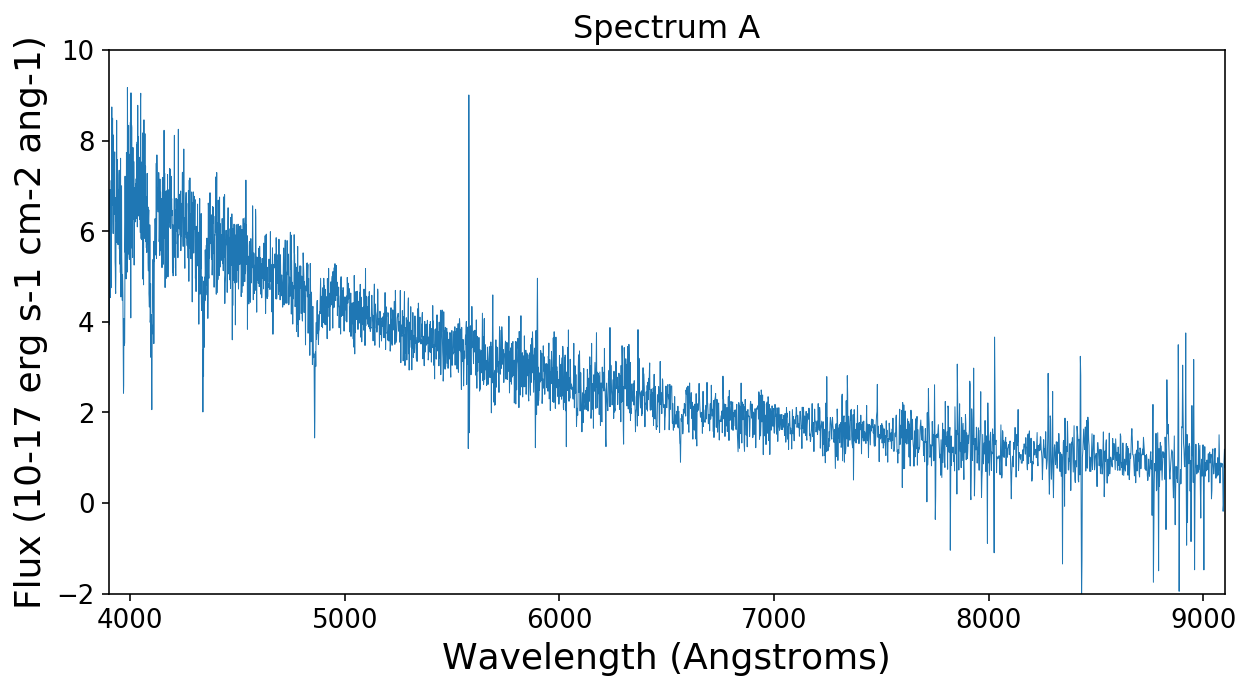

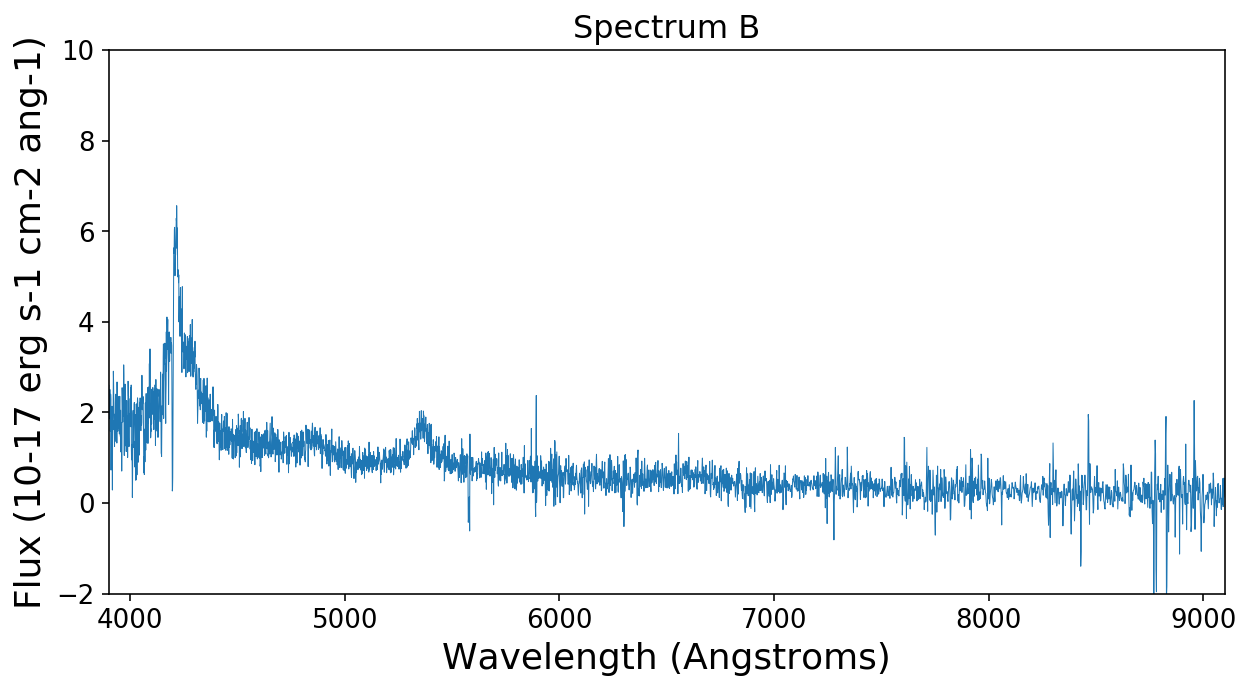

In [3]:
hdulist_a = fits.open('../workshopspectra/spec_03.fits')
lam_a=10**(hdulist_a[1].data.field(1))
flux_a=hdulist_a[1].data.field(0)
hdulist_b = fits.open('../workshopspectra/spec_05.fits')
lam_b=10**(hdulist_b[1].data.field(1))
flux_b=hdulist_b[1].data.field(0)
plt.figure(figsize=[10,5])  # define size of plot window first of all
plt.plot(lam_a,flux_a,linewidth=0.5)  # plotting x against y, using the comma to get data represented by red pixels.
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (10-17 erg s-1 cm-2 ang-1)')
plt.title('Spectrum A')
plt.axis([3900,9100,-2,10])  
plt.show()
plt.figure(figsize=[10,5])  # define size of plot window first of all
plt.plot(lam_b,flux_b,linewidth=0.5)  # plotting x against y, using the comma to get data represented by red pixels.
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (10-17 erg s-1 cm-2 ang-1)')
plt.title('Spectrum B')
plt.axis([3900,9100,-2,10])  
plt.show()


## Exercise A

* Use python to determine the minimum and maximum data points for the two spectra in the following spectral range: 7000-8000 angstrom. Mark these data points on your plots in a format of your choice, and note the values below. (2-5 mins)

* Use python to determine the *mean* continuum flux of the two spectra in the following spectral range: 7000-8000 angstrom. Add a horizontal line representing these flux levels to each of your plots, and note the values below.  (2-10 mins)

* Use python to determine the *mean* continuum flux of the two spectra in the following spectral range: 4500-5500 angstrom. You will need to exclude any emission or absorption lines from your model. Add a horizontal line representing these flux levels to each of your plots, and note the values below. (5-20 mins)

* Use python to determine the standard deviation of the continuum flux in the wavelength range 7000-8000 angstrom, for both spectra, and note the values below. (2-5 mins)

* Use python to identify and mark any pixels more than N standard deviations away from the mean continuum flux in these region, where N is a value of your choosing. (5-20 mins)

* Use python to re-evaluate the continuum flux in the wavelength range 7000-8000 angstrom, excluding any pixels at more than N standard deviations from the mean, and note the values below. (5-20 mins)

* Add sufficient iteration to this process in order to obtain a stable continuum flux level. (5-20 mins)

* What are your final continuum fluxes and associated uncertainties for the 4500-5500 angstrom and 7000-8000 angstrom regions of both spectra? (2-5 mins)

Hints: 
* Have a look at the Observable Properties of Stars notebook from PHY213 or your work on PHY241 with Stu for various methods of selecting subsets of large datasets.
* numpy has a lot of useful built-in statistical functions...


min flux of A= -1.04263
max flux of A= 3.0659
mean flux of A= 1.50728


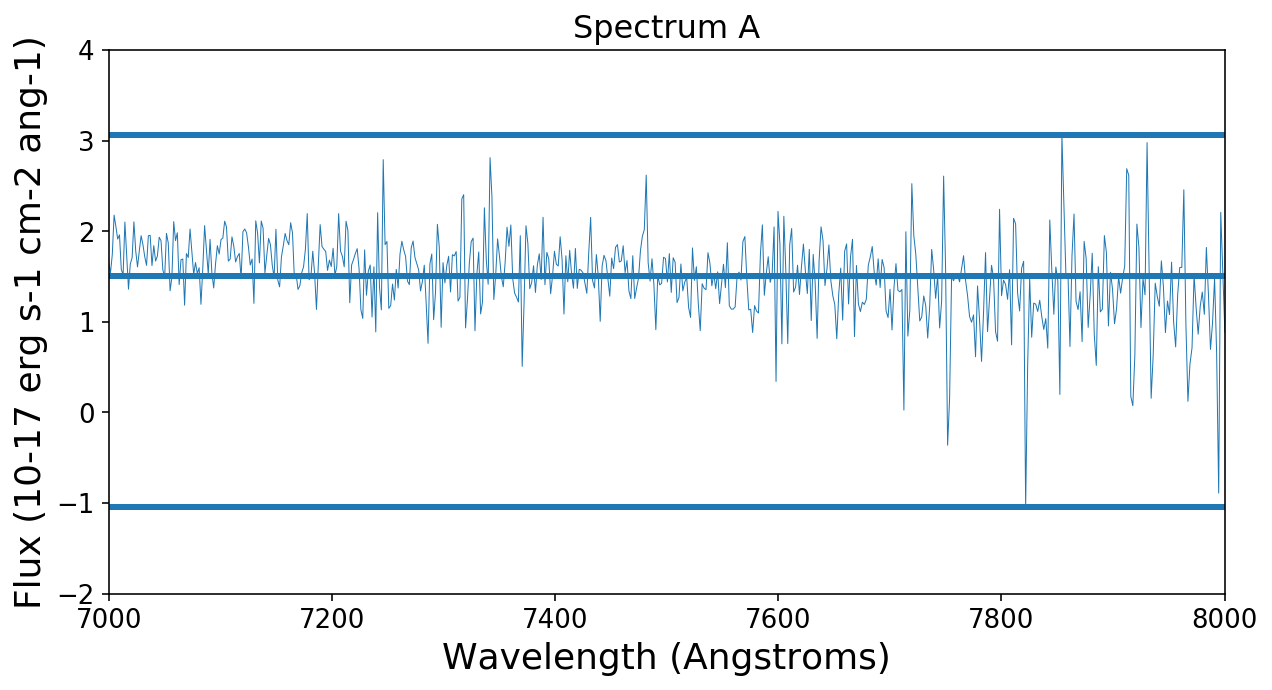

min flux of B= -0.814713
max flux of B= 1.44845
mean flux of B= 0.343493


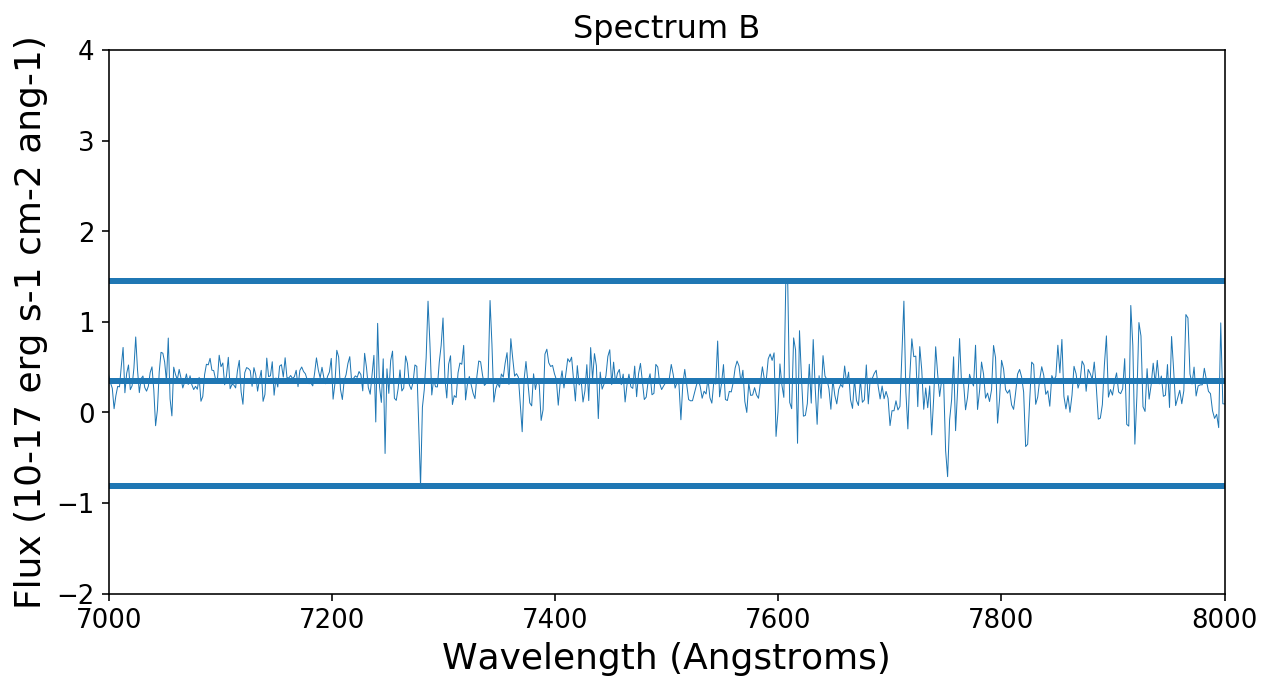

In [4]:
#minimum, maximum and mean data points
#spectrum A
flux_a1=[]
lam_a1=[]

for i in range(0,np.size(lam_a)): 
    l=lam_a[i]  
    if l<8000 and l>7000:
        flux_a1.append(flux_a[i])
        lam_a1.append(lam_a[i])
        
minflux_a = np.min(flux_a1)
maxflux_a = np.max(flux_a1)
meanflux_a = np.mean(flux_a1)

print('min flux of A=', minflux_a)
print('max flux of A=', maxflux_a)
print('mean flux of A=', meanflux_a) 

plt.figure(figsize=[10,5])  # define size of plot window first of all
plt.plot(lam_a,flux_a,linewidth=0.5)  # plotting x against y, using the comma to get data represented by red pixels.
plt.axhline(y = minflux_a)
plt.axhline(y = maxflux_a)
plt.axhline(y = meanflux_a)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (10-17 erg s-1 cm-2 ang-1)')
plt.title('Spectrum A')
plt.axis([7000,8000,-2,4])  
plt.show()

#spectrum B
flux_b1=[]
lam_b1=[]

for i in range(0,np.size(lam_b)): 
    l2=lam_b[i]  
    if l2<8000 and l2>7000:
        flux_b1.append(flux_b[i])
        lam_b1.append(lam_b[i])
        
minflux_b = np.min(flux_b1)
maxflux_b = np.max(flux_b1)
meanflux_b = np.mean(flux_b1)
print('min flux of B=', minflux_b)
print('max flux of B=', maxflux_b)
print('mean flux of B=', meanflux_b)

plt.figure(figsize=[10,5])  # define size of plot window first of all
plt.plot(lam_b,flux_b,linewidth=0.5)  # plotting x against y, using the comma to get data represented by red pixels.
plt.axhline(y = minflux_b)
plt.axhline(y = maxflux_b)
plt.axhline(y = meanflux_b)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (10-17 erg s-1 cm-2 ang-1)')
plt.title('Spectrum B')
plt.axis([7000,8000,-2,4])  
plt.show()

mean flux of A= 4.42865


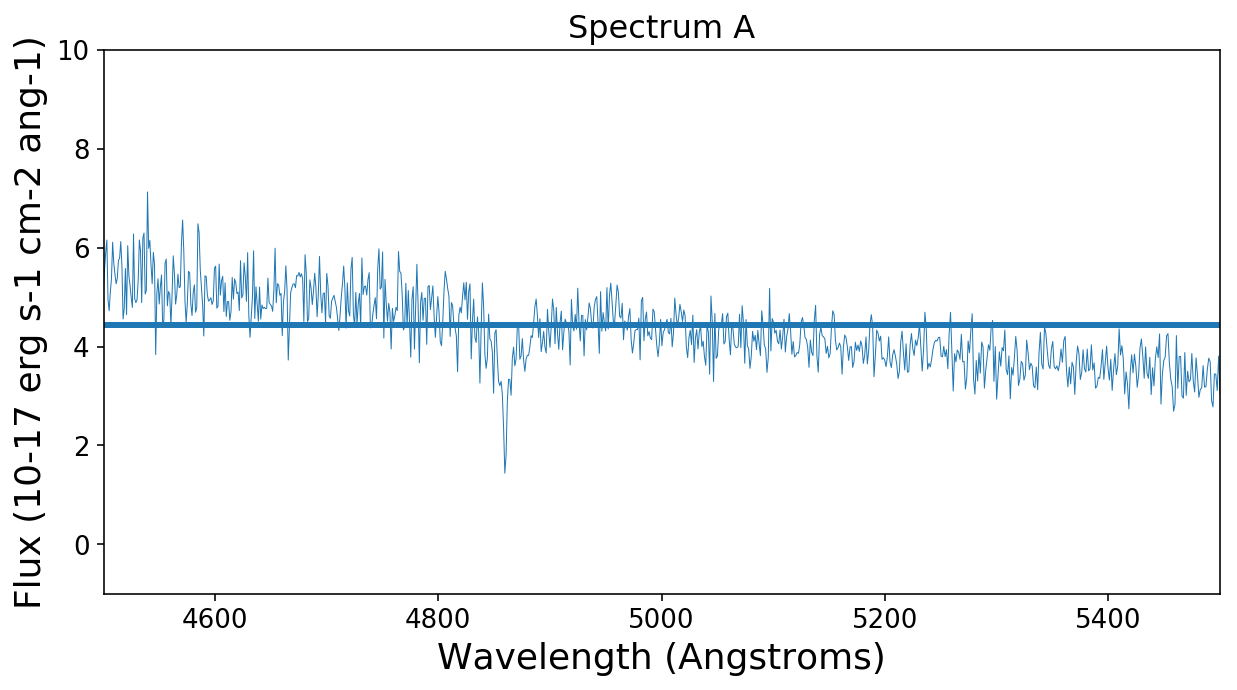

mean flux of B= 1.13309


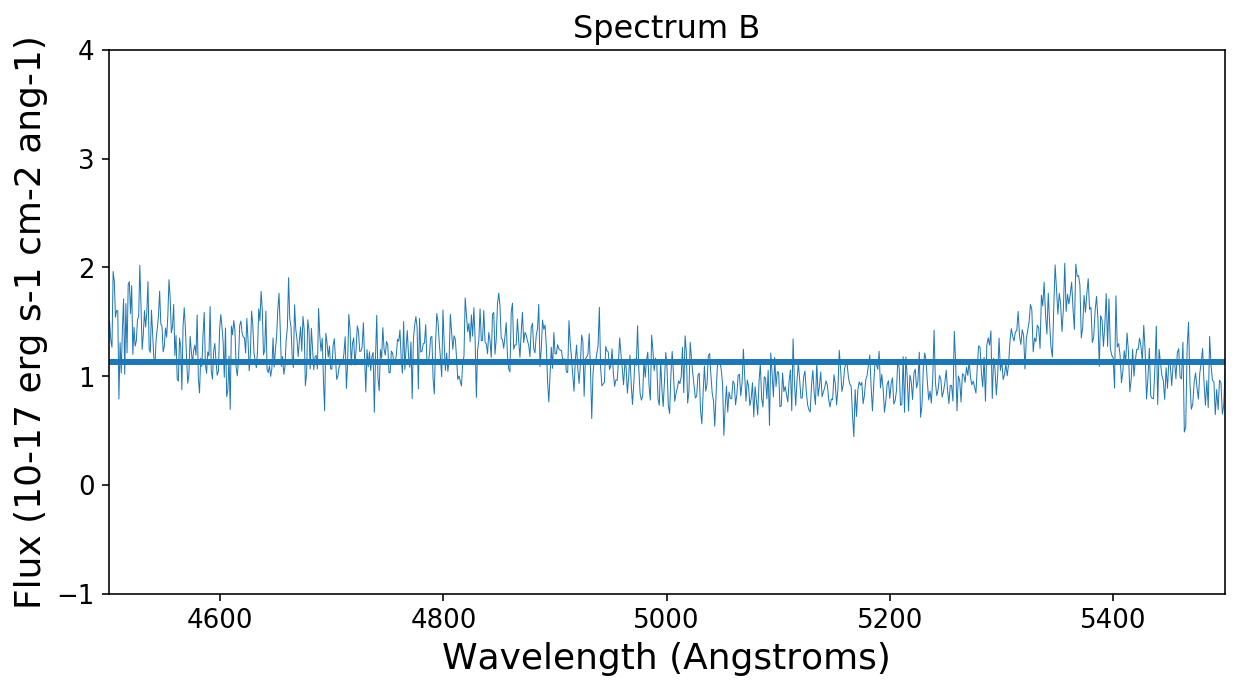

In [5]:
#mean continuum flux 4500-5500 angstrom
#spectrum A
flux_a2=[]
lam_a2=[]

for i in range(0,np.size(lam_a)): 
    l2=lam_a[i]  
    if l2<5300 and l2>4500:
        flux_a2.append(flux_a[i])
        lam_a2.append(lam_a[i])
for i in range(0,np.size(lam_a)): 
    l2=lam_a[i]  
    if l2<5500 and l2>5400:
        flux_a2.append(flux_a[i])
        lam_a2.append(lam_a[i])

meanflux_a2 = np.mean(flux_a2)
print('mean flux of A=', meanflux_a2) 

plt.figure(figsize=[10,5])  # define size of plot window first of all
plt.plot(lam_a,flux_a,linewidth=0.5)  # plotting x against y, using the comma to get data represented by red pixels.
plt.axhline(y = meanflux_a2)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (10-17 erg s-1 cm-2 ang-1)')
plt.title('Spectrum A')
plt.axis([4500,5500,-1,10])  
plt.show()

#spectrum B
flux_b2=[]
lam_b2=[]

for i in range(0,np.size(lam_b)): 
    l2=lam_b[i]  
    if l2<5300 and l2>4500:
        flux_b2.append(flux_b[i])
        lam_b2.append(lam_b[i])
for i in range(0,np.size(lam_b)): 
    l2=lam_b[i]  
    if l2<5500 and l2>5400:
        flux_b2.append(flux_b[i])
        lam_b2.append(lam_b[i])

meanflux_b2 = np.mean(flux_b2)
print('mean flux of B=', meanflux_b2)

plt.figure(figsize=[10,5])  # define size of plot window first of all
plt.plot(lam_b,flux_b,linewidth=0.5)  # plotting x against y, using the comma to get data represented by red pixels.
plt.axhline(y = meanflux_b2)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (10-17 erg s-1 cm-2 ang-1)')
plt.title('Spectrum B')
plt.axis([4500,5500,-1,4])  
plt.show()

In [6]:
#standard deviation of the continuum flux in the wavelength range 7000-8000 angstrom
#uncertainties
#spectrum A
flux_a1=[]
lam_a1=[]

for i in range(0,np.size(lam_a)): 
    l=lam_a[i]  
    if l<8000 and l>7000:
        flux_a1.append(flux_a[i])
        lam_a1.append(lam_a[i])
        
stdflux_a = np.std(flux_a1)
print('Standard deviation flux of A 7000-8000=', stdflux_a)


#spectrum B
flux_b1=[]
lam_b1=[]

for i in range(0,np.size(lam_b)): 
    l2=lam_b[i]  
    if l2<8000 and l2>7000:
        flux_b1.append(flux_b[i])
        lam_b1.append(lam_b[i])
        
stdflux_b = np.std(flux_b1)
print('Standard deviation flux of B 7000-8000=', stdflux_b)


#standard deviation of the continuum flux in the wavelength range 4500-5500 angstrom
#spectrum A
flux_a2=[]
lam_a2=[]

for i in range(0,np.size(lam_a)): 
    l2=lam_a[i]  
    if l2<5300 and l2>4500:
        flux_a2.append(flux_a[i])
        lam_a2.append(lam_a[i])
for i in range(0,np.size(lam_a)): 
    l2=lam_a[i]  
    if l2<5500 and l2>5400:
        flux_a2.append(flux_a[i])
        lam_a2.append(lam_a[i])
        
stdflux_a2 = np.std(flux_a2)
print('Standard deviation flux of A 4500-5500=', stdflux_a2)


#spectrum B
flux_b2=[]
lam_b2=[]

for i in range(0,np.size(lam_b)): 
    l2=lam_b[i]  
    if l2<5300 and l2>4500:
        flux_b2.append(flux_b[i])
        lam_b2.append(lam_b[i])
for i in range(0,np.size(lam_b)): 
    l2=lam_b[i]  
    if l2<5500 and l2>5400:
        flux_b2.append(flux_b[i])
        lam_b2.append(lam_b[i])

        
stdflux_b2 = np.std(flux_b2)
print('Standard deviation flux of B 4500-5500=', stdflux_b2)

Standard deviation flux of A 7000-8000= 0.449525
Standard deviation flux of B 7000-8000= 0.255165
Standard deviation flux of A 4500-5500= 0.732002
Standard deviation flux of B 4500-5500= 0.269028


mean + 3*std for A 7000-8000A= 2.85585689545
mean - 3*std for A 7000-8000A= 0.15870475769


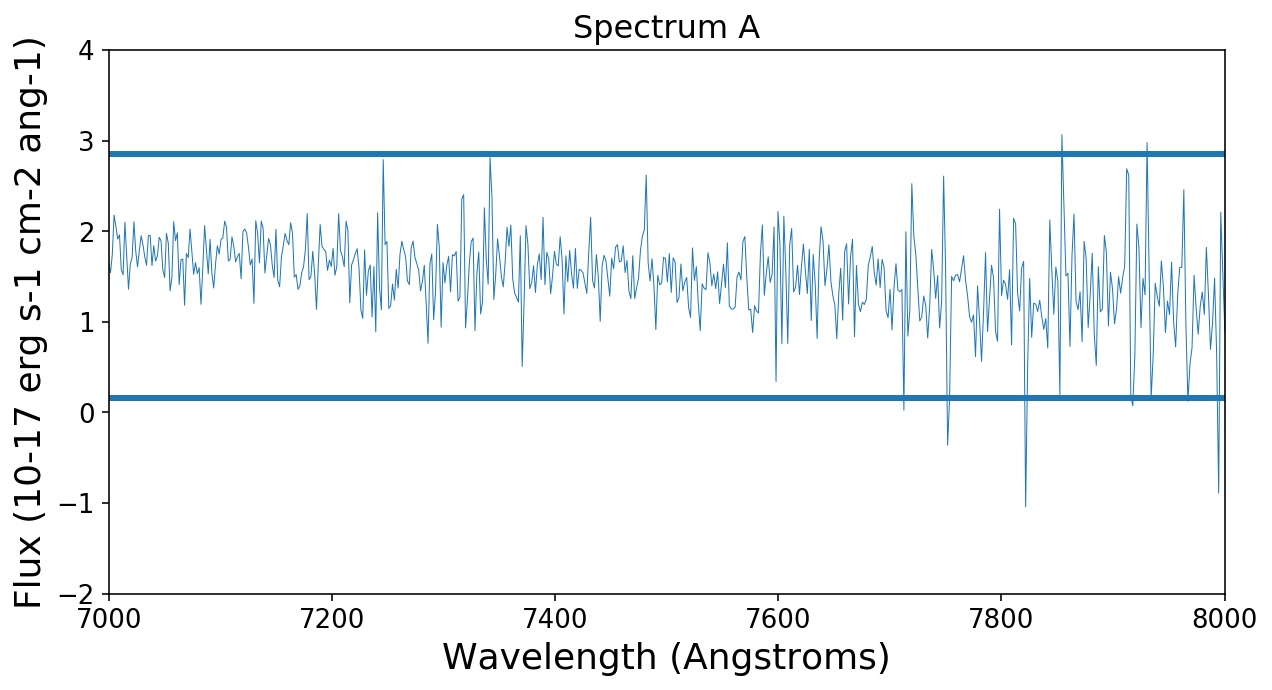

mean + 3*std for B 7000-8000A= 1.10898712277
mean - 3*std for B 7000-8000A= -0.422001510859


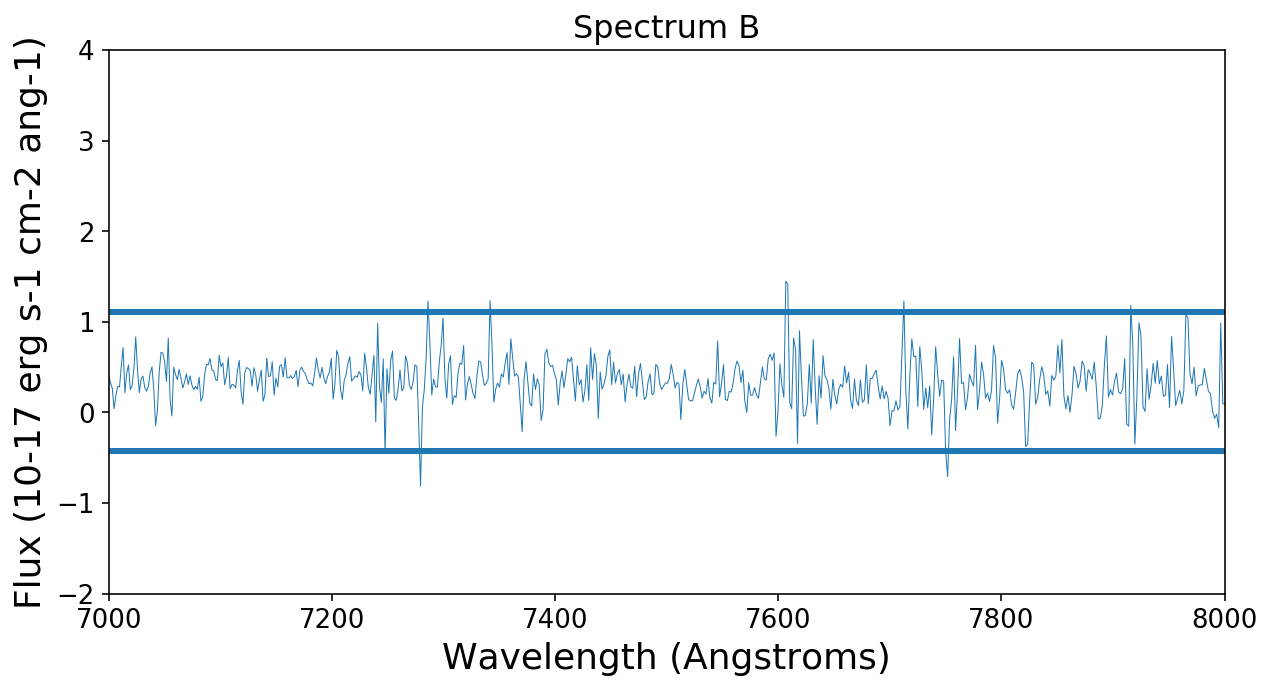

In [7]:
#identify and mark any pixels more than N standard deviations away from the mean continuum flux in these region, where N is a value of your choosing.
#7000-8000 A
#spectrum A
n = 3
n1 =  meanflux_a + stdflux_a * n
n2 =  meanflux_a - stdflux_a * n

print('mean + 3*std for A 7000-8000A=',n1)
print('mean - 3*std for A 7000-8000A=',n2)
plt.figure(figsize=[10,5])  # define size of plot window first of all
plt.plot(lam_a,flux_a,linewidth=0.5)  # plotting x against y, using the comma to get data represented by red pixels.
plt.axhline(y = n1)
plt.axhline(y = n2)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (10-17 erg s-1 cm-2 ang-1)')
plt.title('Spectrum A')
plt.axis([7000,8000,-2,4])  
plt.show()

#spectrum B
n3 = meanflux_b + stdflux_b * n
n4 = meanflux_b - stdflux_b * n

print('mean + 3*std for B 7000-8000A=',n3)
print('mean - 3*std for B 7000-8000A=',n4)
plt.figure(figsize=[10,5])  # define size of plot window first of all
plt.plot(lam_b,flux_b,linewidth=0.5)  # plotting x against y, using the comma to get data represented by red pixels.
plt.axhline(y = n3)
plt.axhline(y = n4)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (10-17 erg s-1 cm-2 ang-1)')
plt.title('Spectrum B')
plt.axis([7000,8000,-2,4])  
plt.show()

mean + 3*std for A 4500-5500A= 6.62466025352
mean - 3*std for A 4500-5500A= 2.23264813423


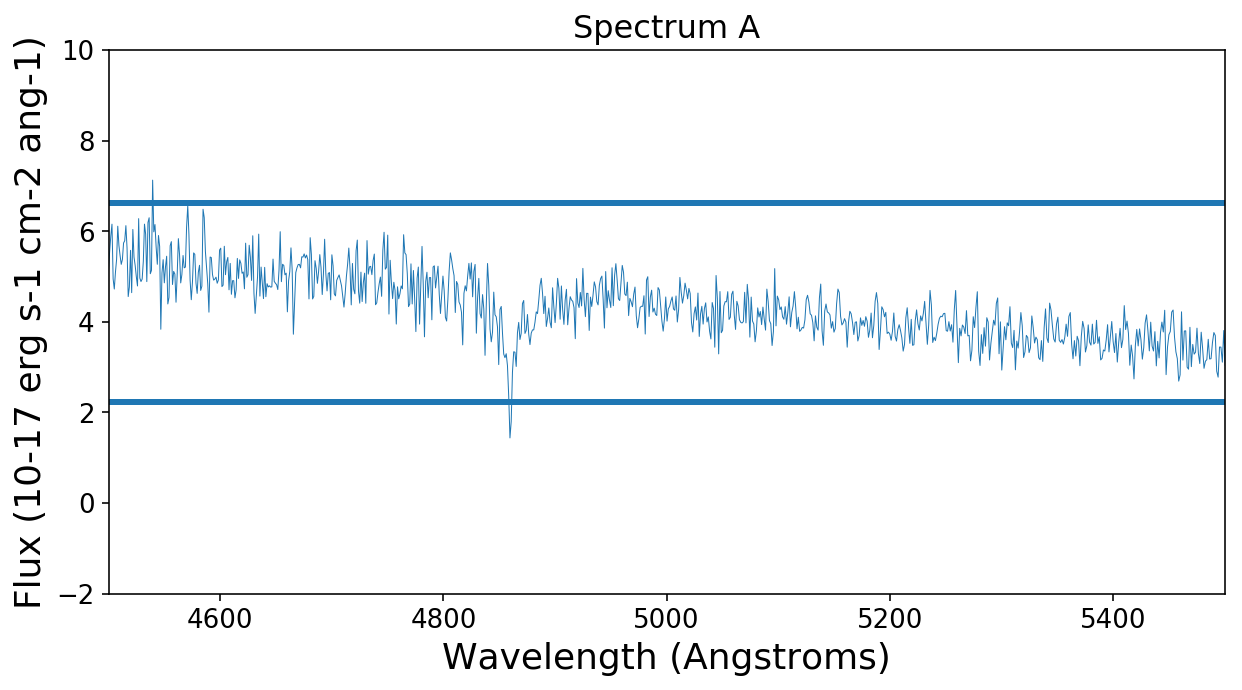

mean + 3*std for B 4500-5500A= 1.94017845392
mean - 3*std for B 4500-5500A= 0.32600826025


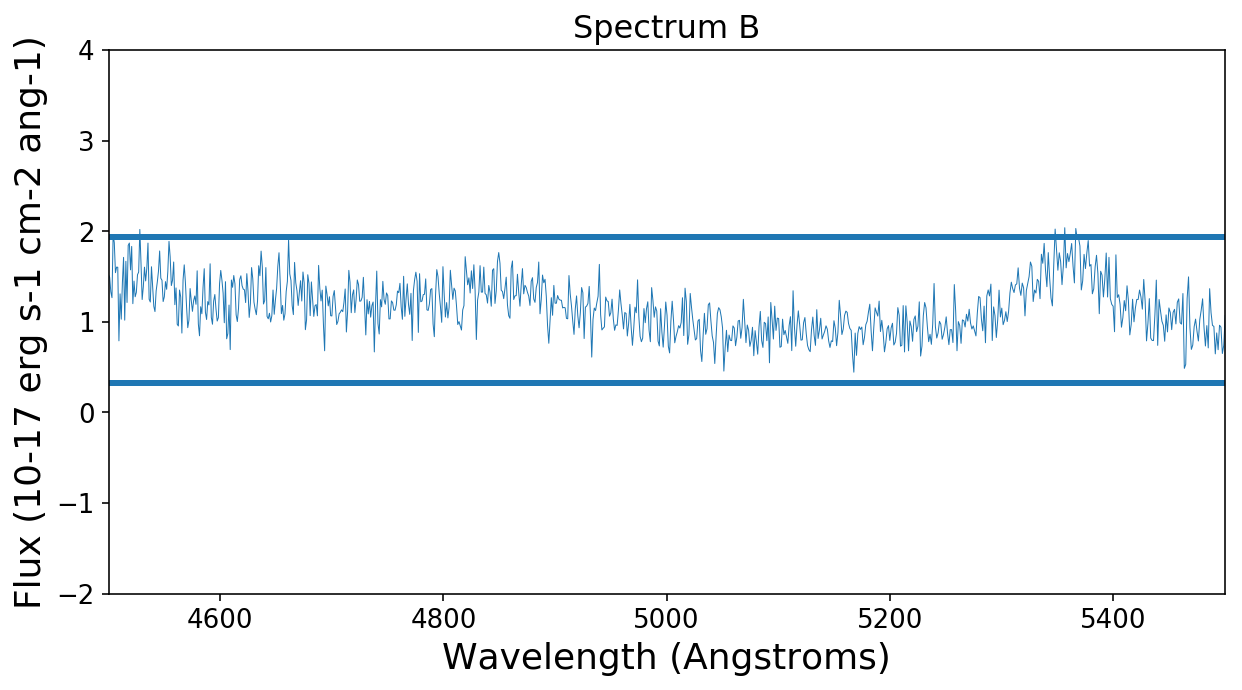

In [8]:
#identify and mark any pixels more than N standard deviations away from the mean continuum flux in these region, where N is a value of your choosing.
#4500-5500 A
#spectrum A
n = 3
n10 =  meanflux_a2 + stdflux_a2 * n
n20 =  meanflux_a2 - stdflux_a2 * n

print('mean + 3*std for A 4500-5500A=',n10)
print('mean - 3*std for A 4500-5500A=',n20)
plt.figure(figsize=[10,5])  # define size of plot window first of all
plt.plot(lam_a,flux_a,linewidth=0.5)  # plotting x against y, using the comma to get data represented by red pixels.
plt.axhline(y = n10)
plt.axhline(y = n20)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (10-17 erg s-1 cm-2 ang-1)')
plt.title('Spectrum A')
plt.axis([4500,5500,-2,10])  
plt.show()

#spectrum B
n30 = meanflux_b2 + stdflux_b2 * n
n40 = meanflux_b2 - stdflux_b2 * n

print('mean + 3*std for B 4500-5500A=',n30)
print('mean - 3*std for B 4500-5500A=',n40)

plt.figure(figsize=[10,5])  # define size of plot window first of all
plt.plot(lam_b,flux_b,linewidth=0.5)  # plotting x against y, using the comma to get data represented by red pixels.
plt.axhline(y = n30)
plt.axhline(y = n40)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (10-17 erg s-1 cm-2 ang-1)')
plt.title('Spectrum B')
plt.axis([4500,5500,-2,4])  
plt.show()

mean flux of A 7000-8000= 1.53357 +/- 0.662504


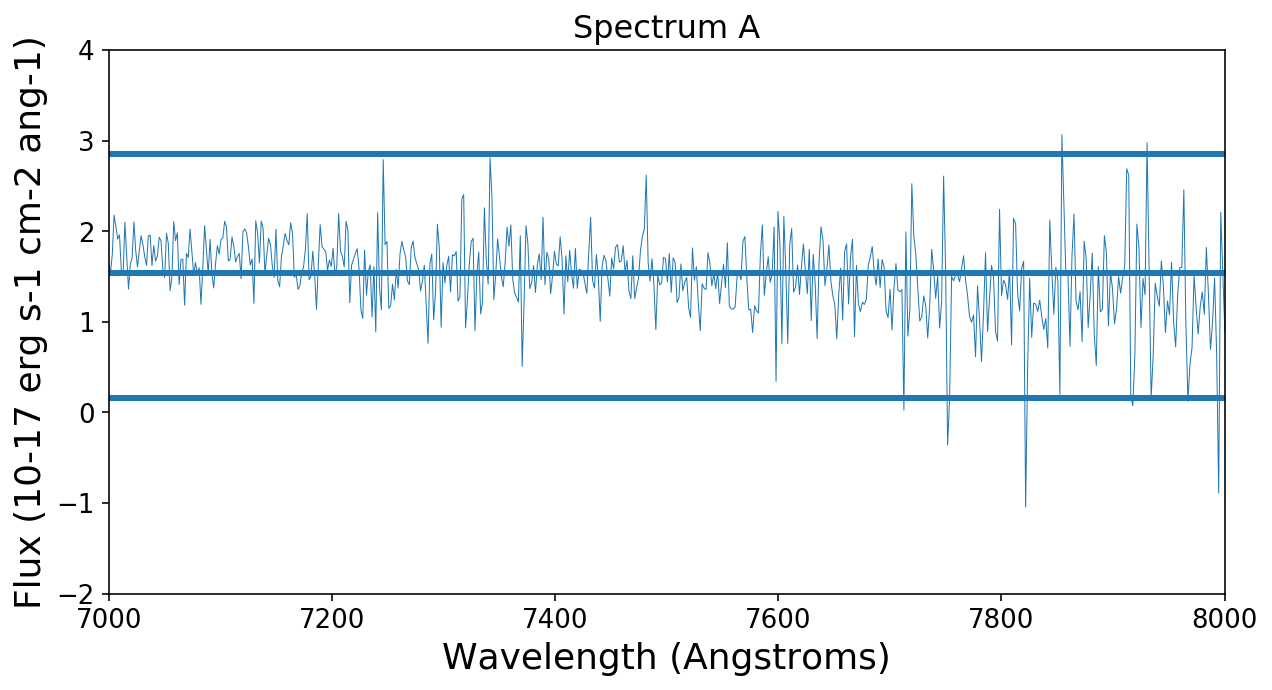

In [9]:
#re-evaluate the continuum flux in the wavelength range 7000-8000 angstrom, excluding any pixels at more than N=2 standard deviations from the mean!
#second mean data points
#spectrum A
flux_a1=[]
lam_a1=[]
flux_a3=[]
lam_a3=[]

for i in range(0,np.size(lam_a)): 
    l=lam_a[i]  
    if l<8000 and l>7000:
        flux_a1.append(flux_a[i])
        lam_a1.append(lam_a[i])

for g in range(0, np.size(flux_a)):
    h=flux_a[g]
    if h<2.8558568954467773 and h>0.15870475769042969:
        flux_a3.append(flux_a[g])
        lam_a3.append(lam_a[g])

meanflux_a3 = np.mean(flux_a3)
stdflux_a3 = np.std(flux_a3)
print('mean flux of A 7000-8000=', meanflux_a3, '+/-', stdflux_a3) 

plt.figure(figsize=[10,5])  # define size of plot window first of all
plt.plot(lam_a,flux_a,linewidth=0.5)  # plotting x against y, using the comma to get data represented by red pixels.
plt.axhline(y = n1)
plt.axhline(y = n2)
plt.axhline(y = meanflux_a3)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (10-17 erg s-1 cm-2 ang-1)')
plt.title('Spectrum A')
plt.axis([7000,8000,-2,4])  
plt.show()


mean flux of B 7000-8000= 0.476022 +/- 0.328952


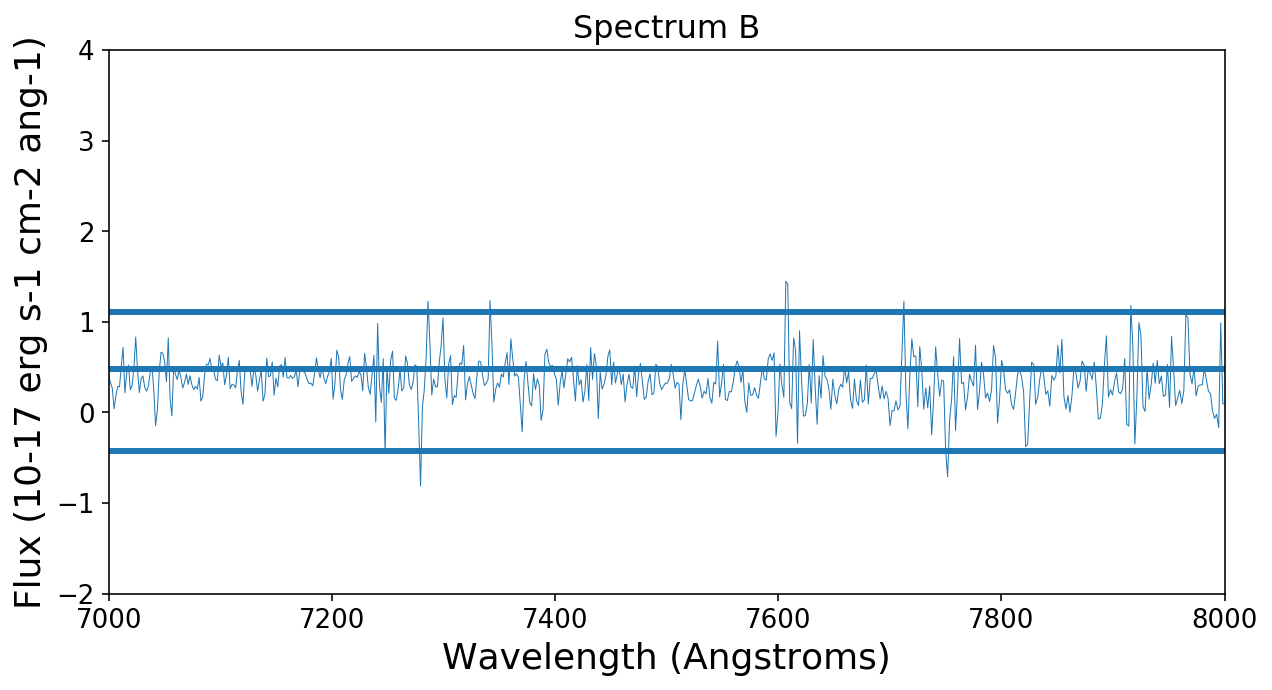

In [10]:
#spectrum B
flux_b1=[]
lam_b1=[]
flux_b4=[]
lam_b4=[]

for i in range(0,np.size(lam_b)): 
    l=lam_b[i]  
    if l<8000 and l>7000:
        flux_b1.append(flux_b[i])
        lam_b1.append(lam_b[i])

for j in range(0, np.size(flux_b)):
    k=flux_b[j]
    if k<1.1089871227741241 and k>-0.42200151085853577:
        flux_b4.append(flux_b[j])
        lam_b4.append(lam_b[j])

meanflux_b4 = np.mean(flux_b4)
stdflux_b4 = np.std(flux_b4)
print('mean flux of B 7000-8000=', meanflux_b4, '+/-', stdflux_b4) 

plt.figure(figsize=[10,5])  # define size of plot window first of all
plt.plot(lam_b,flux_b,linewidth=0.5)  # plotting x against y, using the comma to get data represented by red pixels.
plt.axhline(y = n3)
plt.axhline(y = n4)
plt.axhline(y = meanflux_b4)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (10-17 erg s-1 cm-2 ang-1)')
plt.title('Spectrum B')
plt.axis([7000,8000,-2,4])  
plt.show()

In [10]:
#iteration step: we changed n multiple times, in order to see if it works and the code gave reasonable mean fluxes.

mean flux of A 4500-5500= 4.2307 +/- 1.21327


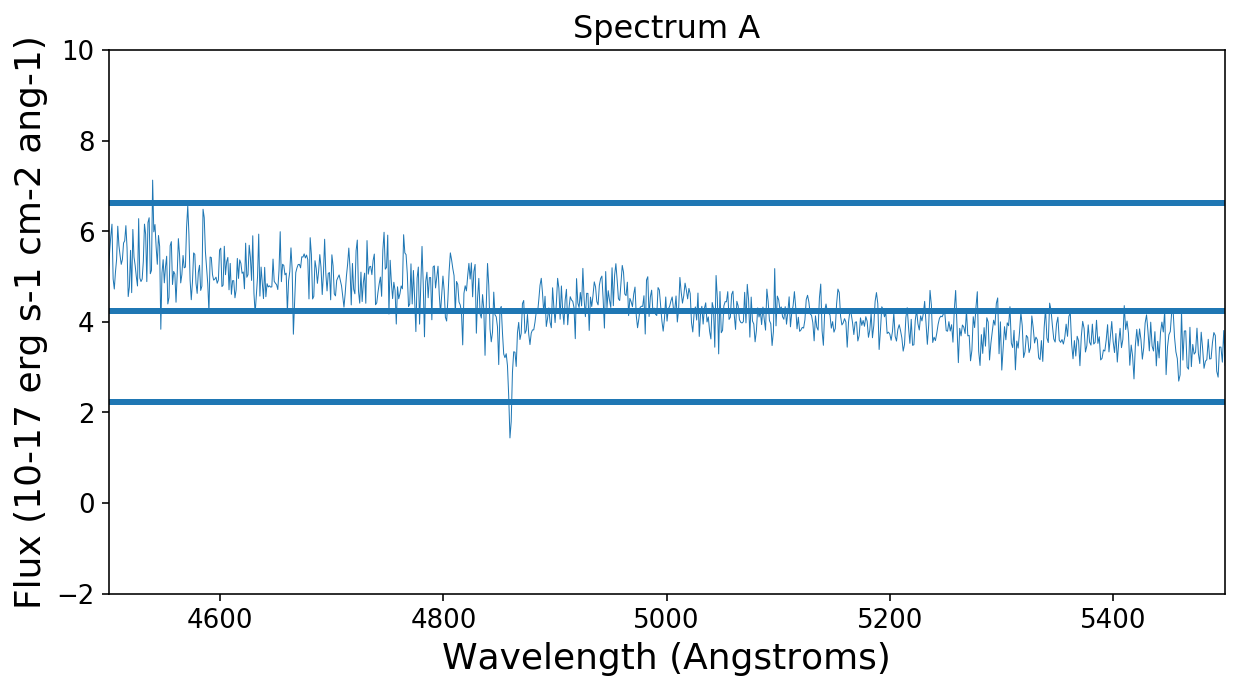

In [11]:
#re-evaluate the continuum flux in the wavelength range 4500-5500 angstrom, excluding any pixels at more than N=2 standard deviations from the mean!
#second mean data points
#spectrum A

flux_a2=[]
lam_a2=[]
flux_a20=[]
lam_a20=[]

for i in range(0,np.size(lam_a)): 
    l2=lam_a[i]  
    if l2<5300 and l2>4500:
        flux_a2.append(flux_a[i])
        lam_a2.append(lam_a[i])
for i in range(0,np.size(lam_a)): 
    l2=lam_a[i]  
    if l2<5500 and l2>5400:
        flux_a2.append(flux_a[i])
        lam_a2.append(lam_a[i])

for g in range(0, np.size(flux_a)):
    p=flux_a[g]
    if p<6.6246602535247803 and p>2.2326481342315674:
        flux_a20.append(flux_a[g])
        lam_a20.append(lam_a[g])

meanflux_a20 = np.mean(flux_a20)
stdflux_a20 = np.std(flux_a20)
print('mean flux of A 4500-5500=', meanflux_a20, '+/-', stdflux_a20) 

plt.figure(figsize=[10,5])  # define size of plot window first of all
plt.plot(lam_a,flux_a,linewidth=0.5)  # plotting x against y, using the comma to get data represented by red pixels.
plt.axhline(y = n10)
plt.axhline(y = n20)
plt.axhline(y = meanflux_a20)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (10-17 erg s-1 cm-2 ang-1)')
plt.title('Spectrum A')
plt.axis([4500,5500,-2,10])  
plt.show()


mean flux of B 4500-5500= 0.902455 +/- 0.423124


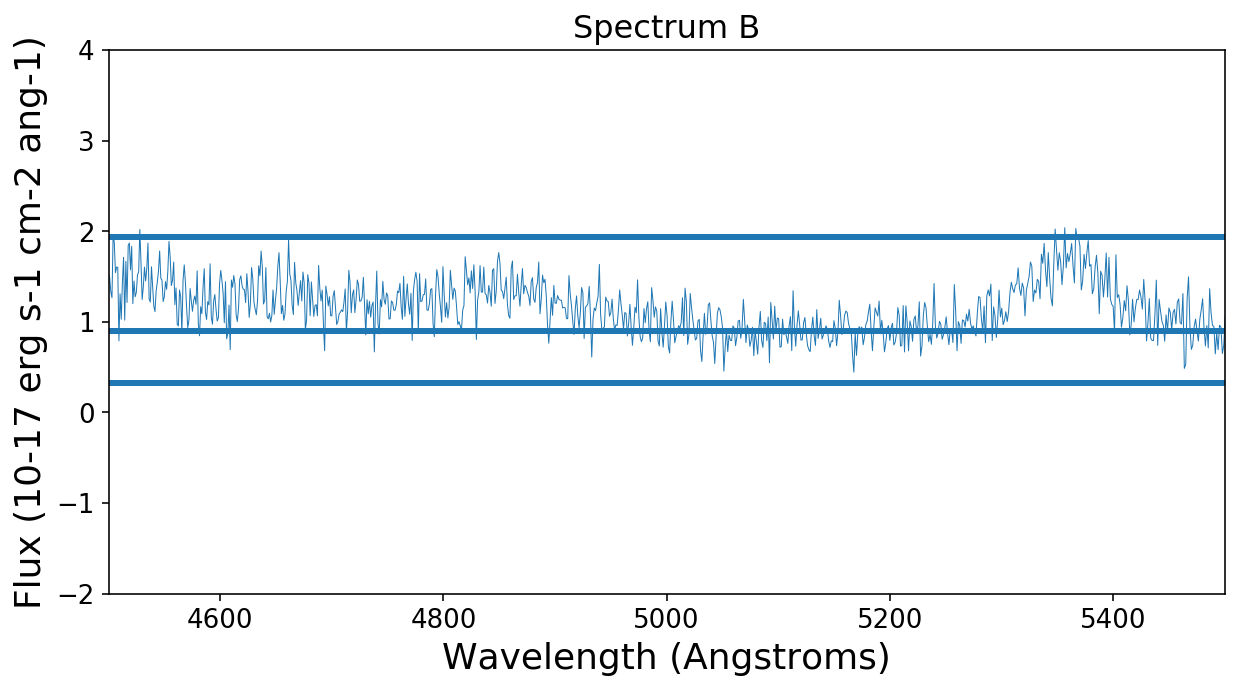

In [12]:
#SPECTRUM B
flux_b2=[]
lam_b2=[]
flux_b20=[]
lam_b20=[]

for i in range(0,np.size(lam_b)): 
    l2=lam_b[i]  
    if l2<5300 and l2>4500:
        flux_b2.append(flux_b[i])
        lam_b2.append(lam_b[i])
for i in range(0,np.size(lam_b)): 
    l2=lam_b[i]  
    if l2<5500 and l2>5400:
        flux_b2.append(flux_b[i])
        lam_b2.append(lam_b[i])

for g in range(0, np.size(flux_b)):
    m=flux_b[g]
    if m<1.9401784539222717 and m>0.32600826025009155:
        flux_b20.append(flux_b[g])
        lam_b20.append(lam_b[g])

meanflux_b20 = np.mean(flux_b20)
stdflux_b20 = np.std(flux_b20)
print('mean flux of B 4500-5500=', meanflux_b20, '+/-', stdflux_b20) 

plt.figure(figsize=[10,5])  # define size of plot window first of all
plt.plot(lam_b,flux_b,linewidth=0.5)  # plotting x against y, using the comma to get data represented by red pixels.
plt.axhline(y = n30)
plt.axhline(y = n40)
plt.axhline(y = meanflux_b20)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (10-17 erg s-1 cm-2 ang-1)')
plt.title('Spectrum B')
plt.axis([4500,5500,-2,4])  
plt.show()

In [35]:
print('mean flux of A 7000-8000 =', (meanflux_a3, '\xb1', stdflux_a3), '10\u207B\xb9\u2077 erg s\u207B\xb9 cm\u207B\xb2 \u212b\u207B\xb9')
print('mean flux of B 7000-8000 =', (meanflux_b4, '\xb1', stdflux_b4), '10\u207B\xb9\u2077 erg s\u207B\xb9 cm\u207B\xb2 \u212b\u207B\xb9') 
print('mean flux of A 4500-5500 =', (meanflux_a20, '\xb1', stdflux_a20), '10\u207B\xb9\u2077 erg s\u207B\xb9 cm\u207B\xb2 \u212b\u207B\xb9') 
print('mean flux of B 4500-5500 =', (meanflux_b20, '\xb1', stdflux_b20), '10\u207B\xb9\u2077 erg s\u207B\xb9 cm\u207B\xb2 \u212b\u207B\xb9') 


mean flux of A 7000-8000 = (1.5335699, '±', 0.66250414) 10⁻¹⁷ erg s⁻¹ cm⁻² Å⁻¹
mean flux of B 7000-8000 = (0.47602215, '±', 0.3289516) 10⁻¹⁷ erg s⁻¹ cm⁻² Å⁻¹
mean flux of A 4500-5500 = (4.2306995, '±', 1.2132702) 10⁻¹⁷ erg s⁻¹ cm⁻² Å⁻¹
mean flux of B 4500-5500 = (0.90245539, '±', 0.42312407) 10⁻¹⁷ erg s⁻¹ cm⁻² Å⁻¹
